In [ ]:
# Mengimport Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, make_circles, make_moons


In [ ]:
# Membaca file csv

data = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [ ]:
# Memeriksa data kosong 

data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Memeriksa data yang memiliki duplikat

data.duplicated().sum()

0

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


In [ ]:
silhouette_scores = []
cluster_range = range(2, 11)

In [19]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


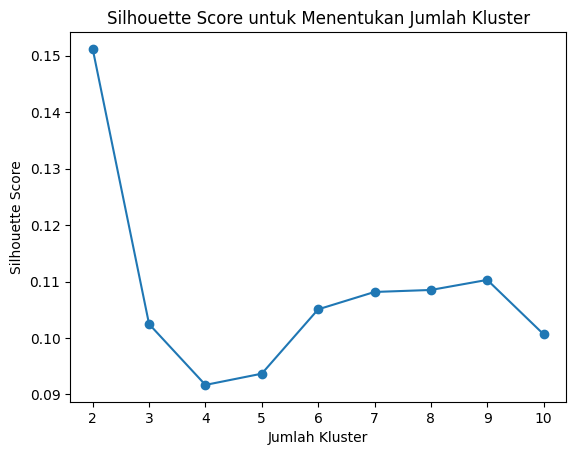

In [20]:
# Cari jumlah kluster dengan Silhouette Score tertinggi
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

# Plot hasil Silhouette Score
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Kluster')
plt.show()


In [21]:
optimal_clusters

2